# **Assignment 10**

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [112]:
# Load datasets here once and assign to variables iris and boston

from sklearn import datasets
iris = datasets.load_iris()

# Boston was removed from scikit-learn since version 1.2 but you can still load it manually

# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

# Define the column names
boston_columns = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"]

# Read the boston file into a single-column DataFrame
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_fwf(data_url, widths=[1000], skiprows=22, header=None)

# Merge every two lines after the header. it isn't one record per line, it's one record per two lines. 
all_data = []
for i in range(0, len(df), 2):
    # Assuming there are no missing lines, merge line i and i+1
    combined_line = df.iloc[i, 0].strip() + " " + df.iloc[i+1, 0].strip()
    all_data.append(combined_line.split())

# Now `all_data` should be a list of lists, with each inner list containing the split values of one complete record.
# Convert the list of lists into a DataFrame
boston= pd.DataFrame(all_data, columns=boston_columns)

# Convert columns to appropriate data types, as they will all be strings initially
boston = boston.astype(float)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Q1: Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [113]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(df.head())
print(iris['target_names'].tolist())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa', 'versicolor', 'virginica']


**Q2: Data set: Iris**
* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [52]:
# frist let's make up some data.
new_observations = [[5.5, 2.6, 2.4, 0.1], [6.7, 3.0, 5.2, 4.3]]
## ----------
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
predicted = knn.predict(new_observations)
# print(predicted) [0, 2]
predicted_target_names = target_names[predicted]
print(predicted_target_names)

['setosa' 'virginica']


**Q3: Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [118]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=40)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1 3


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

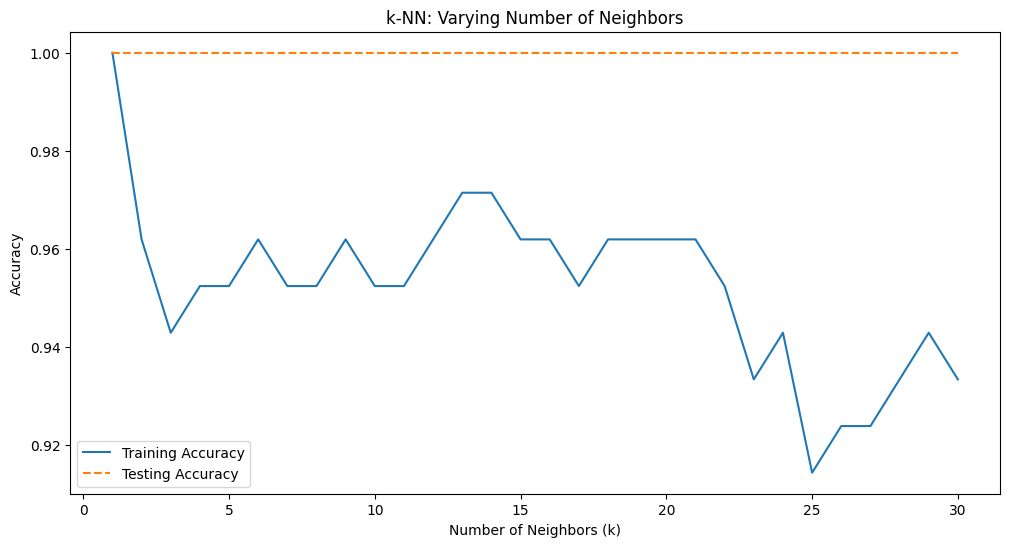

In [62]:
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lists to keep track of accuracy scores
training_accuracy = []
testing_accuracy = []

# Try KNN with k from 1 to 30
k_range = range(1, 31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy = knn.score(X_train, y_train)
    training_accuracy.append(train_accuracy)

    # Compute accuracy on the test set
    test_accuracy = knn.score(X_test, y_test)
    testing_accuracy.append(test_accuracy)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_range, training_accuracy, label='Training Accuracy')
plt.plot(k_range, testing_accuracy, label='Testing Accuracy', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN: Varying Number of Neighbors')
plt.legend()
plt.show()

**Q5: Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [114]:
boston_features = boston.drop('medv', axis=1)
boston_target = boston['medv'].copy()

average_age = round(boston_features['age'].mean(),2)
average_medv = round(boston_target.mean(),2)
print("Average AGE:", average_age)
print("Average MEDV (target):", average_medv)

# Convert the target to a NumPy array
target_values = boston_target.values
print("First 10 target as NumPy array:", target_values[1:10])
print()

Average AGE: 68.57
Average MEDV (target): 22.53
First 10 target as NumPy array: [21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]



**Q6: Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

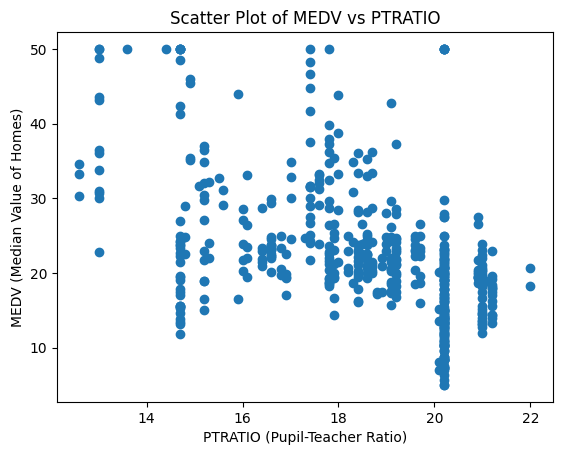

In [91]:
# Plotting the scatter plot
plt.scatter(boston['ptratio'], boston['medv'])
plt.xlabel('PTRATIO (Pupil-Teacher Ratio)')
plt.ylabel('MEDV (Median Value of Homes)')
plt.title('Scatter Plot of MEDV vs PTRATIO')
plt.show()

# Returning PTRATIO as a NumPy array
ptratio_np = boston['ptratio'].values
# ptratio_np 

**Q7: Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

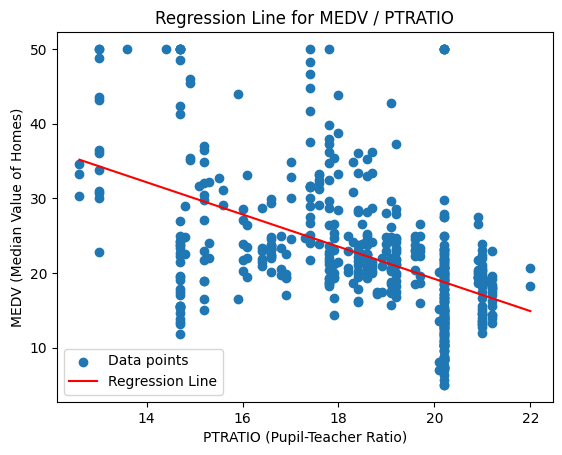

In [106]:
X = boston[['ptratio']]  # Features
y = boston['medv']  # Target

model = LinearRegression()
model.fit(X, y)

# Generate prediction space
prediction_space = np.linspace(X.min(), X.max()).reshape(-1, 1)
prediction_space_df = pd.DataFrame(prediction_space, columns=['ptratio'])

# Predict the target for the prediction space
predicted_values = model.predict(prediction_space_df)

# Plot the data and the regression line
plt.scatter(X, y, label='Data points')
plt.plot(prediction_space, predicted_values, color='red', label='Regression Line')
plt.xlabel('PTRATIO (Pupil-Teacher Ratio)')
plt.ylabel('MEDV (Median Value of Homes)')
plt.title('Regression Line for MEDV / PTRATIO')
plt.legend()
plt.show()


In [104]:

# Return the prediction space and predicted values
(prediction_space.flatten(), predicted_values)

(array([12.6       , 12.79183673, 12.98367347, 13.1755102 , 13.36734694,
        13.55918367, 13.75102041, 13.94285714, 14.13469388, 14.32653061,
        14.51836735, 14.71020408, 14.90204082, 15.09387755, 15.28571429,
        15.47755102, 15.66938776, 15.86122449, 16.05306122, 16.24489796,
        16.43673469, 16.62857143, 16.82040816, 17.0122449 , 17.20408163,
        17.39591837, 17.5877551 , 17.77959184, 17.97142857, 18.16326531,
        18.35510204, 18.54693878, 18.73877551, 18.93061224, 19.12244898,
        19.31428571, 19.50612245, 19.69795918, 19.88979592, 20.08163265,
        20.27346939, 20.46530612, 20.65714286, 20.84897959, 21.04081633,
        21.23265306, 21.4244898 , 21.61632653, 21.80816327, 22.        ]),
 array([35.16421874, 34.75039328, 34.33656781, 33.92274235, 33.50891688,
        33.09509142, 32.68126595, 32.26744049, 31.85361502, 31.43978956,
        31.02596409, 30.61213863, 30.19831316, 29.7844877 , 29.37066224,
        28.95683677, 28.54301131, 28.12918584, 27